In [3]:
# import all packages
import corner,emcee
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
###INSERT YOUR CHI-SQUARE RESULTS HERE: (Should be an array of length 3)
chisq_result=np.array([ , , ])

In [4]:
# read in some data we created for this example (.dat is a generic filename, it's just a text file)
example_data_1D = pandas.read_csv('1D_intro_examples.dat',sep=' ',header=0)#this file is separated by spaces and its first line contains the names of the columns (header) 
print(example_data_1D.head())

          x          y      error
0  0.585921  13.648840  10.321681
1  0.664152   7.321433  12.307353
2  0.666299   8.691450  11.459853
3  0.717126  -7.759708  14.261307
4  0.828552   8.019604  11.597092


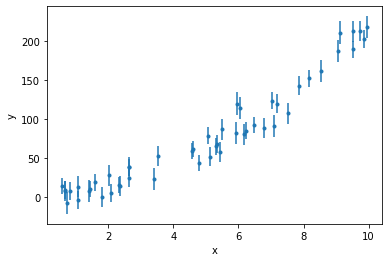

In [5]:
#Let's plot the data, with error bars, that we read from file (See Day 2)
plt.errorbar(example_data_1D['x'], #x,y,and error are the column names
             example_data_1D['y'], 
             yerr=example_data_1D['error'],#yerr denotes an error in the y-direction for plotting
             fmt='.') #fmt is "format", saying that I want data marked by "points"
plt.xlabel('x') #set the x-axis label 
plt.ylabel('y') #set the y-axis label
plt.show()

In [6]:
#The data were generated with a simple quadratic equation:
#ax^2+bx+c. The true model values are:
a_true=2
b_true=1.3
c_true=6
def my_model(x,a,b,c): #We define the model described above
    return(a*x**2+b*x+c)

In [7]:
# We can combine a likelihood function with a prior function.

# Create a log-prior function. 
def lnprior(theta):#accepts the model parameters (theta)
    a,b,c = theta #set a,b,c (see above)
    
    #give the following bounds: a=(0,5),b=(-5,5),c=(0,10)
    if 0 < a < 5. and -5 < b < 5 and 0 < c < 10: #we are assuming a "uniform prior" on all parameters, which is the same as just giving each parameter bounds.
        return 0.0 #if you try parameters inside the bounds, return a probability of 1 (log(1)=0)
    return -np.inf #if you try parameters outside the bounds, return 0 (log(0)=-inf)

# This is a log-likelihood function, which is commonly used.
def lnprob(theta, x, y, yerr,mod): #accepts theta (the model parameters), and the same x,y,yerr, and mod from above
    lp = lnprior(theta) #get the probability from the prior function
    if not np.isfinite(lp): 
        return -np.inf #return a probability of negative infinity if the prior is negative infinity

    #the chisq_likelihood function returns a chi-square, 
    #which you want to be as small as possible. We are 
    #maximizing the likelihood here, so we take
    #the negative of the chi-square function.
    return lp - chisq_likelihood(theta, [x, y, yerr,mod]) #the total likelihood is the product of the prior and the likelihood (or the sum of the log-prior and log-likelihood)


#Set up the MCMC to sample the full parameter space
ndim, nwalkers = 3, 100 #number of parameters to fit (3); number of individual "walkers" that randomly sample the space. Choose any number, the higher the slower.
starting_positions = [chisq_result + 0.1*np.random.randn(ndim) for i in range(nwalkers)] #Start the walkers in a random (small) gaussian near the result from the chi-square fit

#Let's just look at where walkers are starting in the a-b parameter space
#(Doesn't need to be included in your own code)
#Notice we get a random sampling near our previous result to start. 
plt.scatter([x[0] for x in starting_positions],#get the "a" parameter locations
            [x[1] for x in starting_positions])#get the "b" parameter locations
plt.scatter(chisq_result[0],chisq_result[1],color='r')#the chi-square result
plt.xlabel('a')
plt.ylabel('b')
plt.show()


NameError: name 'result' is not defined